In [1]:
from obspy import Trace, UTCDateTime
from obspy.clients.fdsn import Client

client = Client("IRIS")

**get waveform**

obpsy support wildcards

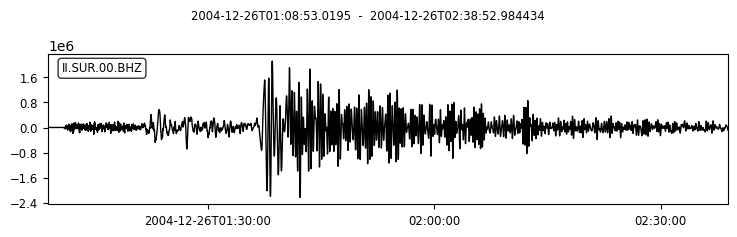

In [2]:
time = UTCDateTime("2004-12-26 00:58:53")
starttime = time + 60*10
endtime = time + 60*100

trace = client.get_waveforms(network="II", station="SUR",
                             location="00", channel="BHZ",
                             starttime=starttime, endtime=endtime)
trace.plot();

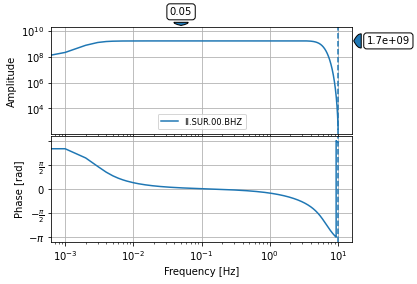

In [3]:
inventory = client.get_stations(network="II", station="SUR",
                             location="00", channel="BHZ",
                             starttime=starttime, endtime=endtime,
                             level='response')
inventory.plot_response(min_freq=1e-3);

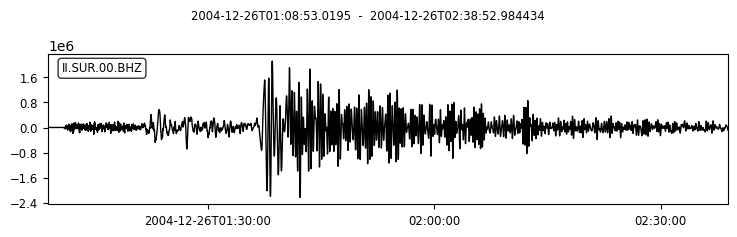

In [4]:
tracevel = client.get_waveforms(network="II", station="SUR",
                             location="00", channel="BHZ",
                             starttime=starttime, endtime=endtime,
                             attach_response=True)
tracevel.plot();

1 Trace(s) in Stream:
II.SUR.00.BHZ | 2004-12-26T01:08:53.019500Z - 2004-12-26T02:38:52.984434Z | 20.0 Hz, 108000 samples

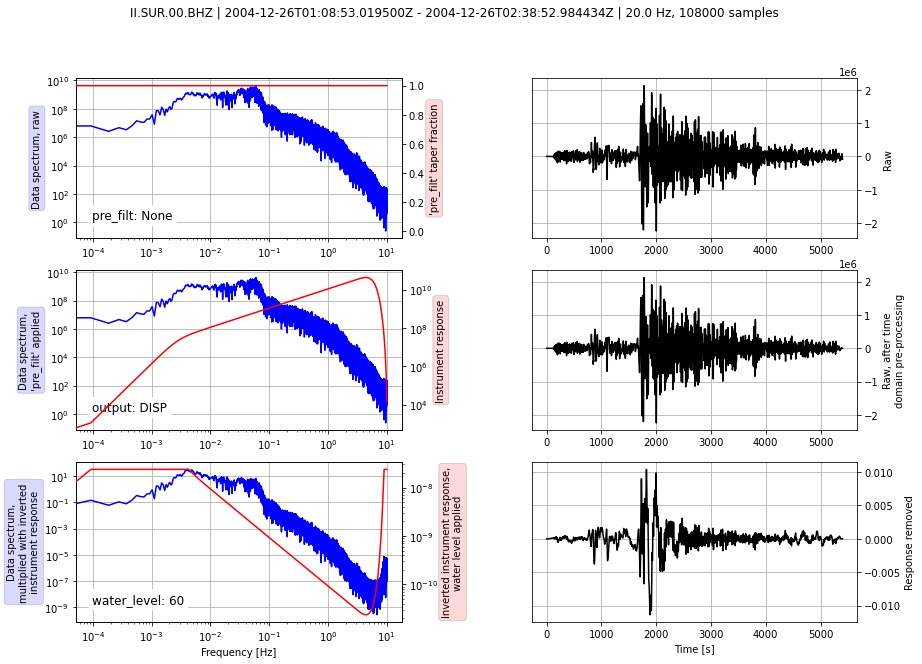

In [5]:
trace1 = tracevel.copy()
trace1.remove_response(output='DISP', plot = True)
# trace1.plot();

In [49]:

inventory[0][0].latitude
inventory[0][0].longitude
inventory[0][0].elevation




1770.0

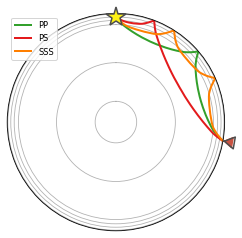

<PolarAxesSubplot:>

In [1]:
from obspy.taup import TauPyModel
model = TauPyModel(model='iasp91')
arrivals = model.get_ray_paths(200, 100, phase_list=['PP', 'SSS', 'PS', 'P'])
arrivals.plot_rays(plot_type='spherical', phase_list=['PP', 'SSS', 'PS', 'P'], plot_all=False, legend=True)

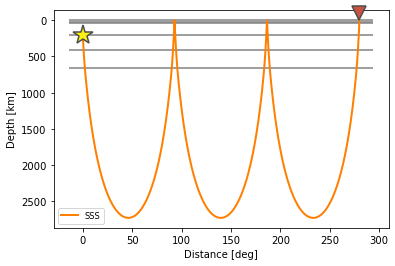

<AxesSubplot:xlabel='Distance [deg]', ylabel='Depth [km]'>

In [76]:
from obspy.taup import TauPyModel
model = TauPyModel(model='ak135')
arrivals = model.get_ray_paths(200, 280, phase_list=['PP', 'SSS', 'PS', 'P'])
arrivals.plot_rays(plot_type='cartesian', phase_list=['PP', 'SSS', 'PS', 'P'], plot_all=False, legend=True)

In [25]:
x = client.get_events(starttime=starttime-60*15, endtime=endtime, minmagnitude=6, latitude=inventory[0][0].latitude,
                  longitude=inventory[0][0].longitude)

In [26]:
x

6 Event(s) in Catalog:
2004-12-26T02:00:39.060000Z |  +6.926,  +94.575 | 6.0 mb
2004-12-26T01:25:46.980000Z |  +5.463,  +94.282 | 6.1 mb
2004-12-26T01:22:23.690000Z |  +7.372,  +93.998 | 6.0 mb
2004-12-26T01:21:19.080000Z |  +6.326,  +93.394 | 6.1 mb
2004-12-26T01:06:10.870000Z |  +9.841,  +94.114 | 6.6 mb
2004-12-26T00:58:52.050000Z |  +3.413,  +95.901 | 9.0 MW

In [27]:
x[5]

Event:	2004-12-26T00:58:52.050000Z |  +3.413,  +95.901 | 9.0 MW

	            resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=1916079")
	             event_type: 'earthquake'
	    preferred_origin_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=3788623")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=18508217")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements

In [34]:
sumatra = x[5]
sumatra.origins[0]

Origin
	   resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=3788623")
	          time: UTCDateTime(2004, 12, 26, 0, 58, 52, 50000)
	     longitude: 95.9012
	      latitude: 3.4125
	         depth: 26100.0
	 creation_info: CreationInfo(author='ISC')

In [55]:
from obspy.core import AttribDict

ev = AttribDict()

print(sumatra.origins[0].latitude)
print(sumatra.origins[0].longitude)
print(sumatra.origins[0].depth)

ev.latitude = sumatra.origins[0].latitude
ev.longitude = sumatra.origins[0].longitude
ev.depth = sumatra.origins[0].depth

station = AttribDict()

station.latitude = inventory[0][0].latitude
station.longitude = inventory[0][0].longitude
station.depth = inventory[0][0].elevation



3.4125
95.9012
26100.0


In [38]:
model = TauPyModel("iasp91")

In [63]:
model = TauPyModel(model="ak135")
# model.get_travel_times()

from obspy.geodetics.base import locations2degrees

deg = locations2degrees(ev.latitude, ev.longitude, station.latitude, station.longitude)
print(station.longitude)
print(station.latitude)
print(ev.longitude)
print(ev.latitude)

20.8117
-32.3797
95.9012
3.4125


In [64]:
deg

79.336499212323403

In [77]:
traveltime = model.get_travel_times(source_depth_in_km=ev.depth/1000,
                                      distance_in_degree=deg, phase_list=["P","pP","S"])

In [80]:
print(traveltime)

3 arrivals
	P phase arrival at 723.360 seconds
	pP phase arrival at 731.748 seconds
	S phase arrival at 1322.318 seconds
